In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.default_rng()


def ising2D(J, h, T, N, M, n):
    """2D Ising model using Metropolis algorithm

    input:
        J: interaction energy
        h: external magnetic field
        T: temperature
        N: size of the spin lattice
        M: number of Monte Carlo steps
        n: number of samples to calculate average

    output:
        E_avg: average energy at temperature T
        M_avg: average magnetization at temperature T
        C: specific heat at temperature T
        X: susceptibility initialize at temperature T
    """
    # initialize
    spins = rng.choice([-1, 1], size=(N, N))  # random spin initialization
    # spins = np.ones((N, N))  # all spin up initialization

    # periodic boundary condition
    # E = interaction energy with four neighbors + external field energy
    up = np.roll(spins, 1, axis=0)
    down = np.roll(spins, -1, axis=0)
    left = np.roll(spins, 1, axis=1)
    right = np.roll(spins, -1, axis=1)
    E = -J * (np.sum(spins * up) + np.sum(spins * down) + np.sum(spins * left) + np.sum(spins * right)) - h * np.sum(spins)

    E_list = np.zeros(M)  # list of energy after per N**2 Monte Carlo step
    M_list = np.zeros(M)  # list of magnetization after per N**2 Monte Carlo step

    # Metropolis algorithm
    for i in range(M):
        for j in range(N**2):
            # randomly choose a spin
            x = rng.integers(N)
            y = rng.integers(N)

            # calculate energy difference
            # 2*spins[x, y] is the energy of the spin itself
            delta_E = J * 2 * spins[x, y] * (spins[x + 1 - N, y] + spins[x - 1, y] + spins[x, y + 1 - N] + spins[x, y - 1]) + h * 2 * spins[x, y]

            # flip
            if delta_E < 0 or rng.random() < np.exp(-delta_E / T):
                spins[x, y] *= -1
                E += delta_E

        E_list[i] = E
        M_list[i] = np.sum(spins)

    # average
    E_avg = np.average(E_list[n:])
    M_avg = np.average(M_list[n:])
    C = np.var(E_list[n:]) / T**2
    X = np.var(M_list[n:]) / T

    # # vectorized algorithm
    # x, y = rng.integers(N, size=(2, M * N**2))  # x, y are two arrays of size (M * N**2,)

    # delta_E = J * 2*spins[x, y]*(spins[x+1-N, y]+spins[x-1, y]+spins[x, y+1-N]+spins[x, y-1]) + h * 2*spins[x, y]
    # delta_E size = (M * N**2,)
    # mask = delta_E < 0
    # mask |= rng.random(M * N**2) < np.exp(-delta_E / T)  # mask is a boolean array of size (M * N**2,)

    # spins_list = np.zeros((M, N, N))
    # spins_list[0] = spins
    # spins_list[1:] = spins_list[:-1] # copy the previous spins
    # spins_list[1:][mask] *= -1  # flip the spins
    # spins = spins_list[-1]

    # up = np.roll(spins_list, 1, axis=1)
    # down = np.roll(spins_list, -1, axis=1)
    # left = np.roll(spins_list, 1, axis=2)
    # right = np.roll(spins_list, -1, axis=2)
    # E_list = -J * (np.sum(spins_list*up, axis=(1, 2)) + np.sum(spins_list*down, axis=(1, 2)) + np.sum(spins_list*left, axis=(1, 2)) + np.sum(spins_list*right, axis=(1, 2))) - h*np.sum(spins_list, axis=(1, 2)) # size = (M,)

    # M_list = np.sum(spins_list, axis=(1, 2)) # size = (M,)

    # E_avg = np.average(E_list[n:])
    # M_avg = np.average(M_list[n:])
    # C = np.var(E_list[n:]) / T**2
    # X = np.var(M_list[n:]) / T # size = (N, N)

    return E_avg, M_avg, C, X

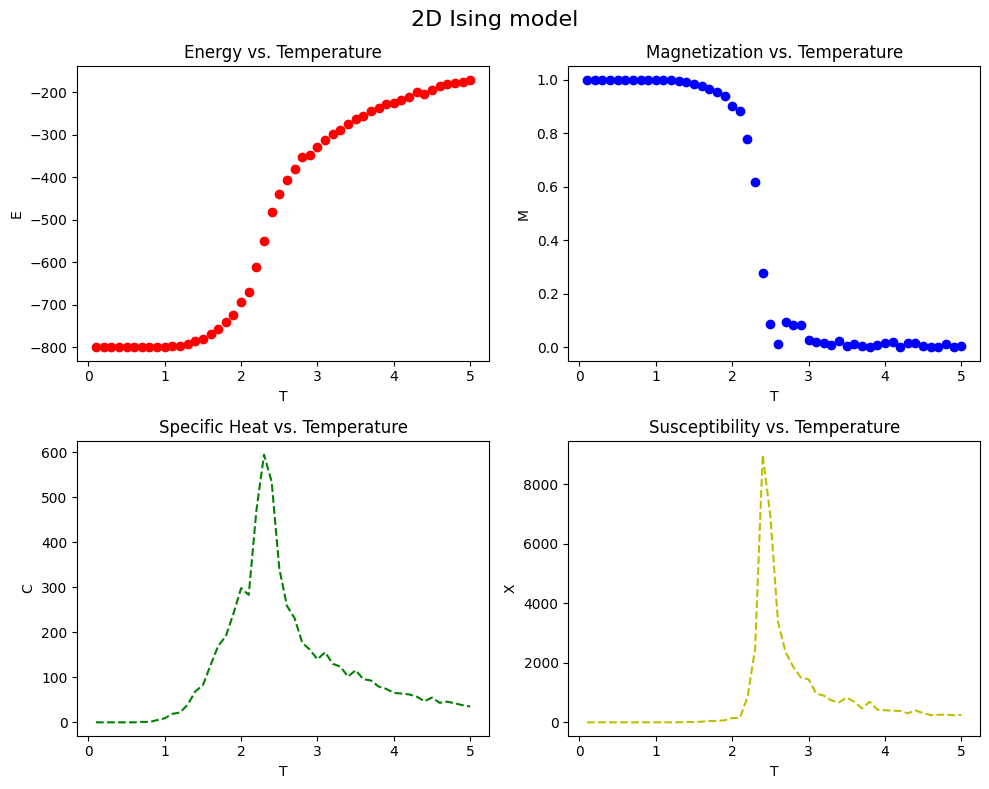

In [ ]:
# 2D Ising model
J = 1
h = 0
T = 1
N = 20
M = 1000
n = 500

T_list = np.linspace(0.1, 5, 15)
E_list = np.zeros(len(T_list))
M_list = np.zeros(len(T_list))
C_list = np.zeros(len(T_list))
X_list = np.zeros(len(T_list))

for i in range(len(T_list)):
    E_list[i], M_list[i], C_list[i], X_list[i] = ising2D(J, h, T_list[i], N, M, n)

# # save data to txt file
# np.savetxt("T_list.txt", T_list)
# np.savetxt("E_list.txt", E_list)
# np.savetxt("M_list.txt", M_list)
# np.savetxt("C_list.txt", C_list)
# np.savetxt("X_list.txt", X_list)

######################################################################################################

# # read data from txt file
# T_list = np.loadtxt("./data/2D_demo/T_list.txt")
# E_list = np.loadtxt("./data/2D_demo/E_list.txt")
# M_list = np.loadtxt("./data/2D_demo/M_list.txt")
# C_list = np.loadtxt("./data/2D_demo/C_list.txt")
# X_list = np.loadtxt("./data/2D_demo/X_list.txt")


# plot
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("2D Ising model", fontsize=16)

ax1.set_title("Energy vs. Temperature")
ax1.set_xlabel("T")
ax1.set_ylabel("E")
# ax1.plot(T_list, E_list, 'r--')
ax1.scatter(T_list, E_list, c="r")


ax2.set_title("Magnetization vs. Temperature")
ax2.set_xlabel("T")
ax2.set_ylabel("M")
# ax2.plot(T_list, abs(M_list) / N**2, 'b--')
ax2.scatter(T_list, abs(M_list) / N**2, c="b")

ax3.set_title("Specific Heat vs. Temperature")
ax3.set_xlabel("T")
ax3.set_ylabel("C")
ax3.plot(T_list, C_list, "g--")

ax4.set_title("Susceptibility vs. Temperature")
ax4.set_xlabel("T")
ax4.set_ylabel("X")
ax4.plot(T_list, X_list, "y--")

plt.tight_layout()
plt.show()

beta =  0.22212884046772816


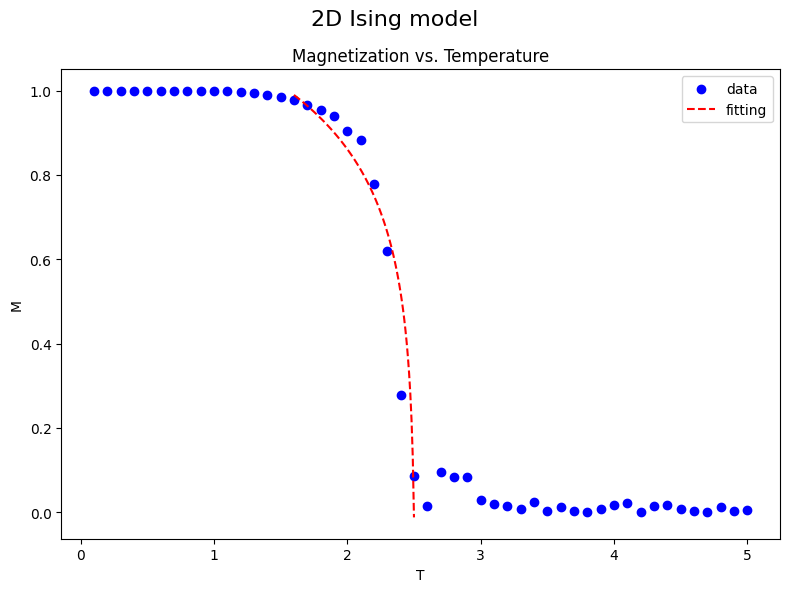

In [ ]:
# beta fitting
import scipy.optimize as opt


T_list = np.loadtxt("./data/2D_demo/T_list.txt")
M_list = np.loadtxt("./data/2D_demo/M_list.txt")


fig, ax = plt.subplots(figsize=(8, 6))
fig.suptitle("2D Ising model", fontsize=16)

ax.set_title("Magnetization vs. Temperature")
ax.set_xlabel("T")
ax.set_ylabel("M")
ax.scatter(T_list, np.abs(M_list) / N**2, c="b", label="data")

begin = 15
end = 25
T_list = T_list[begin:end]
M_list = abs(M_list[begin:end]) / N**2
# Tc = 2 / np.log(1 + np.sqrt(2))
Tc = T_list[-1] + 0.01


# fitting function
def func(x, a, b):
    return a + b * np.log(Tc - x)


a, b = opt.curve_fit(func, T_list, M_list)[0]

print("beta = ", b)

Tdata = np.linspace(T_list[0], T_list[-1], 100)
ax.plot(Tdata, func(Tdata, a, b), "r--", label="fitting")
ax.legend()

plt.tight_layout()
plt.show()

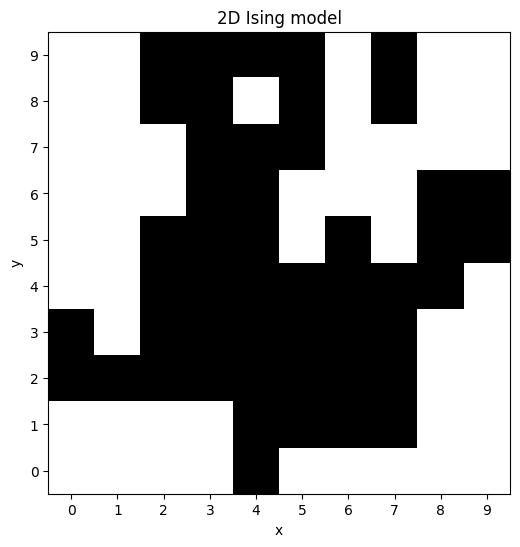

In [ ]:
from matplotlib.animation import FuncAnimation


# 2D Ising model, spin animation
J = 1
h = 0
N = 10
M = 100

T = 4

# initialize
spins = rng.choice([-1, 1], size=(N, N))  # random spin initialization
# spins = np.ones((N, N))  # all spin up initialization

E = -J * (
    np.sum(spins * np.roll(spins, 1, axis=0))  # interaction energy with up/down neighbors (periodic boundary condition)
    + np.sum(spins * np.roll(spins, 1, axis=1))  # interaction energy with left/right neighbors (periodic boundary condition)
) - h * np.sum(spins)  # external field energy


# animation
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("2D Ising model")
ax.set_aspect("equal")

ax.set_xlabel("x")
ax.set_ylabel("y")

ax.set_xlim(-0.5, N - 0.5)
ax.set_ylim(-0.5, N - 0.5)

ax.set_xticks(np.arange(0, N, 1))
ax.set_yticks(np.arange(0, N, 1))


def update(i):
    global spins, E
    # Monte Carlo
    for j in range(N**2):
        # randomly choose a spin
        x = rng.integers(N)
        y = rng.integers(N)

        # calculate energy difference
        delta_E = (
            J * 2 * spins[x, y] * (spins[(x + 1) % N, y] + spins[(x - 1) % N, y] + spins[x, (y + 1) % N] + spins[x, (y - 1) % N]) + h * 2 * spins[x, y]
        )  # mod N is periodic boundary condition, 2*spins[x, y] is the energy of the spin itself

        # Metropolis flip algorithm
        if delta_E < 0 or rng.random() < np.exp(-delta_E / T):
            spins[x, y] *= -1

    # plot
    ax.clear()
    ax.set_title("2D Ising model")
    ax.set_aspect("equal")

    ax.set_xlabel("x")
    ax.set_ylabel("y")

    ax.set_xlim(-0.5, N - 0.5)
    ax.set_ylim(-0.5, N - 0.5)

    ax.set_xticks(np.arange(0, N, 1))
    ax.set_yticks(np.arange(0, N, 1))

    ax.imshow(spins, cmap="gray", vmin=-1, vmax=1)
    return ax


anim = FuncAnimation(fig, update, frames=M, interval=200, repeat=False)
anim.save("2D_Ising_model.gif", writer="pillow", fps=10)